In [20]:
# import math lib
from math import pi

# import Qiskit
# from qiskit import Aer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import Estimator
from qiskit_aer import QasmSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import numpy as np
from scipy.linalg import expm
from qiskit.circuit.library import UnitaryGate, QFT


In [39]:
import numpy as np
import scipy

A = np.array([[1, -1/3],
              [-1/3, 1]])
t = 3*np.pi/4
u = scipy.linalg.expm(1j*A*T)
u_2 = scipy.linalg.expm(1j*2*A*T)
print(u)
print(u_2)


u_inverse = scipy.linalg.expm(1j*(-A)*T)
u2_inverse = scipy.linalg.expm(1j*(-2*A)*T)
print(u_inverse)

[[-0.5+0.5j  0.5+0.5j]
 [ 0.5+0.5j -0.5+0.5j]]
[[ 1.66533454e-16-5.55111512e-17j -1.00000000e+00-1.11022302e-16j]
 [-1.00000000e+00+0.00000000e+00j -2.77555756e-16+4.44089210e-16j]]
[[-0.5-0.5j  0.5-0.5j]
 [ 0.5-0.5j -0.5-0.5j]]


In [40]:
u_gate = UnitaryGate(u)
cu_gate = u_gate.control()

u2_gate = UnitaryGate(u_2)
cu2_gate = u2_gate.control()

ui_gate = UnitaryGate(u_inverse)
cui_gate = ui_gate.control()

u2i_gate = UnitaryGate(u2_inverse)
cui2_gate = u2i_gate.control()



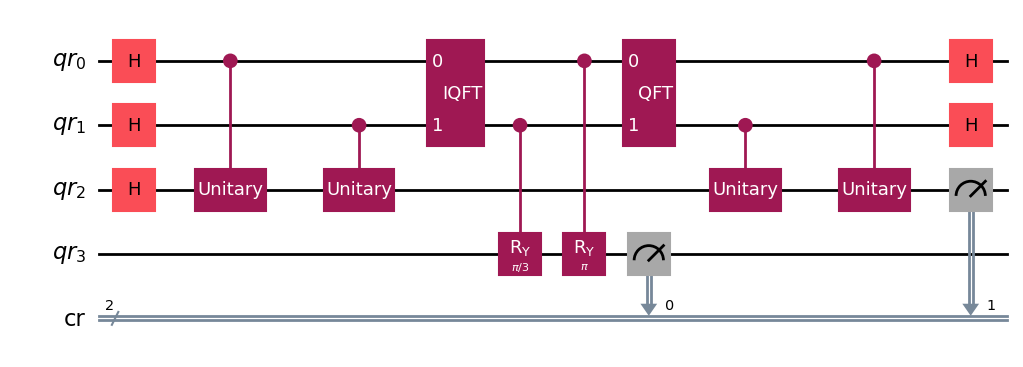

In [134]:
n0 = 0
n1 = 0

# Create Quantum Register called "qr" with 4 qubits
qr = QuantumRegister(4, name="qr")
# Create Classical Register called "cr" with 4 classical bits
cr = ClassicalRegister(2, name="cr")
# Creating Quantum Circuit called "qc" involving Quantum Register "qr" and Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="solve_linear_sys")


qc.h(qr[2])


qc.h(qr[0])
qc.h(qr[1]) 

qc.append(cu_gate, [qr[0], qr[2]])
qc.append(cu2_gate, [qr[1], qr[2]])


qft_dagger = QFT(2, do_swaps=True, inverse=True).to_gate()
qc.append(qft_dagger, [qr[0], qr[1]])


# qc.measure(qr[0], cr[0])
# qc.measure(qr[1], cr[1])

qc.cry(np.pi/3, qr[1], qr[3])
qc.cry(np.pi, qr[0], qr[3])


qc.measure(qr[3], cr[0])


qft = QFT(2, do_swaps=True).to_gate()
qc.append(qft, [qr[0], qr[1]])

qc.append(cui2_gate, [qr[1], qr[2]])
qc.append(cui_gate, [qr[0], qr[2]])

qc.h(qr[0])
qc.h(qr[1]) 

# qc.measure(qr[0], cr[1])
# qc.measure(qr[1], cr[2])
qc.measure(qr[2], cr[1])


qc.draw('mpl')





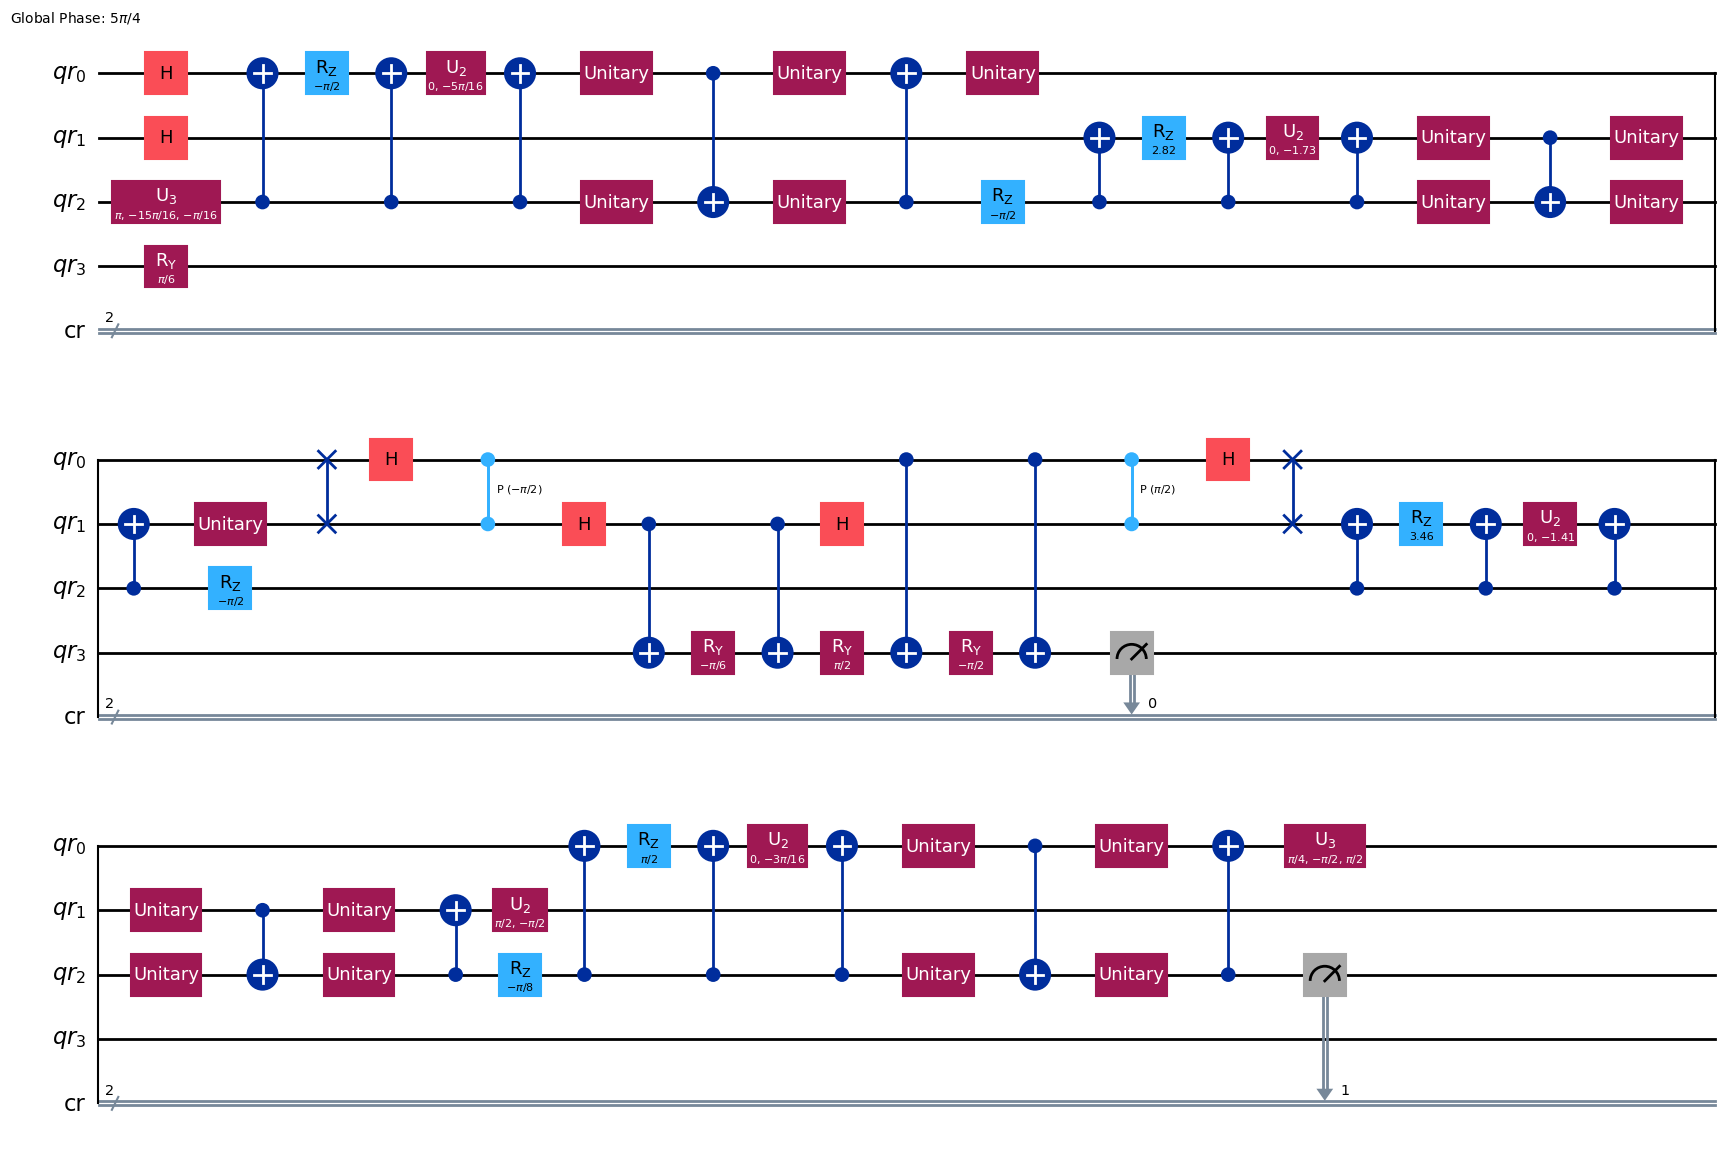

In [122]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
 
backend = QasmSimulator()
backend_options = {"method": "statevector"}

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")



{'11': 11195, '10': 3782, '00': 3750, '01': 1273}
3782
11195
0.3378293881196963


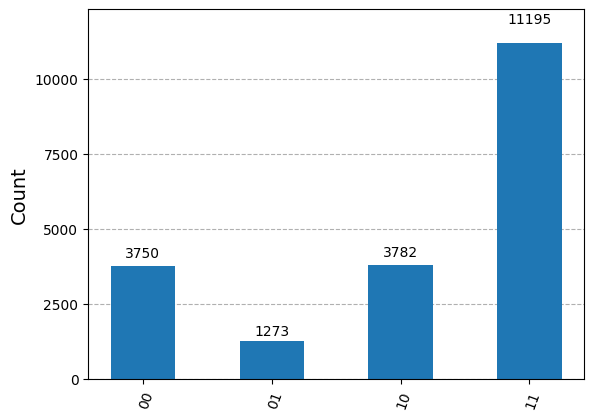

In [123]:

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
sampler.options.default_shots = 20000
result = sampler.run([circuit_isa]).result()
dist = result[0].data.cr.get_counts()
 
print(dist)
   

  
#     Reset the circuit
qc.reset(qr)

n0 = dist["10"]
n1 = dist['11']
# calculate the scale of the elements in result vectot and print it.
p = n0/n1
print(n0)
print(n1)
print(p)
plot_histogram(dist)


{'11': 5026, '01': 4974}
0.4974
0.5026
1.010454362685967


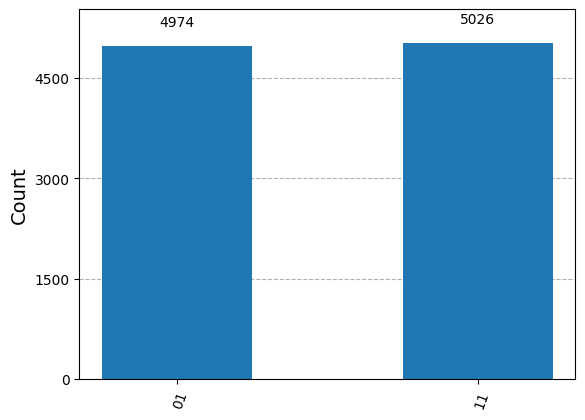

In [135]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile
import qiskit
backend = BasicSimulator('qasm_simulator')



t_qc = transpile(qc, backend)
result = backend.run(t_qc, shots=10000).result()
counts = result.get_counts(t_qc)
print(counts)
print(counts['01'] / (counts['11'] + counts['01']))
print(counts['11'] / (counts['11'] + counts['01']))
print(1/(counts['01']/counts['11']))
qc.draw("mpl")
plot_histogram(counts)

In [125]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import *
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
import numpy as np
# Execute the circuit using the simulator
simulator = qiskit.BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=65536)

#Get the result of the execution
result = job.result()

# Get the counts, the frequency of each answer
counts = result.get_counts(circuit)

# Display the results
plot_histogram(counts)

ImportError: cannot import name 'execute' from 'qiskit' (/Users/apple/anaconda3/envs/cwq/lib/python3.12/site-packages/qiskit/__init__.py)

In [ ]:
bcknd = Aer.get_backend('statevector_simulator')

job_sim = execute(circuit, bcknd)
result = job_sim.result()

o_state_result = result.get_statevector(circuit, decimals=3)
print(o_state_result)